### Overview
This Jupyter notebook can be used to retrieve the pitch data from [pybaseball](https://github.com/jldbc/pybaseball), export it as a csv, and also how to import the csv for future use.

#### Retrieveing the data

In [4]:
# Import necessary libraries
import pybaseball as pyb
from time import time
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#### Importing the data
Only run these once you've either ran the above cells, or if you've downloaded and unzipped the file from [our GitHub](https://github.com/Erdos-Projects/fall-2025-sports-analytics)

In [13]:
csv_folder_path = "/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics"

In [14]:
csv_files = glob.glob(f"{csv_folder_path }/*.csv")

In [12]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics


In [15]:
print("CSV files found:", csv_files)

CSV files found: ['/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics/all_june_2025_pitches.csv', '/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics/all_may_2025_pitches.csv', '/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics/all_september_2025_pitches.csv', '/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics/all_july_2025_pitches.csv', '/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics/all_april_2025_pitches.csv', '/Users/andreiprokhorov/Library/CloudStorage/GoogleDrive-andrew43570@gmail.com/My Drive/Industry transition/fall-2025-sports-analytics/all_august_2025_pitches.csv

In [16]:
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


In [17]:
df = combined_df[::-1] # reverse to get the order correct

In [23]:
df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitch_count,last_pitch_of_game
754043,4887,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False
754042,4686,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,False
754041,4539,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,False
754040,4323,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,strikeout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,False
754039,4137,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",664056,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1986,SL,2025-06-30,87.9,2.74,6.43,"Banks, Tanner",593428,621383,NaN,...,-0.55,0.55,47.3,NaN,NaN,NaN,NaN,NaN,5,False
3,1922,SL,2025-06-30,87.3,2.82,6.42,"Banks, Tanner",593428,621383,NaN,...,-0.46,0.46,46.9,NaN,NaN,NaN,NaN,NaN,6,False
2,1811,FF,2025-06-30,93.2,2.59,6.47,"Banks, Tanner",593428,621383,single,...,-0.09,0.09,49.3,4.244712,7.659826,31.567804,31.050805,25.892308,7,False
1,1798,SI,2025-06-30,92.7,2.53,6.49,"Banks, Tanner",630105,621383,NaN,...,1.18,1.18,47.4,NaN,NaN,NaN,NaN,NaN,8,False


In [4]:
# careful with what the variables mean. 'pitch_number' is within the plate appearance, as you can see here
df['pitch_number'][:10]

109967    1
109966    2
109965    1
109964    2
109963    3
109962    4
109961    1
109960    2
109959    3
109958    4
Name: pitch_number, dtype: int64

In [21]:
# Group by game and pitcher, then create a pitch count
df['pitch_count'] = df.groupby(['game_pk', 'pitcher']).cumcount() + 1


/var/folders/tt/jcc6npcd60n8dct63xynxvs80000gn/T/ipykernel_17971/2257908391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pitch_count'] = df.groupby(['game_pk', 'pitcher']).cumcount() + 1


In [6]:
# make the dataframe a little easier to deal with
keeper_columns = ['game_date','game_pk', 'release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher','inning', 'inning_topbot', 'events', 'description','pitch_number','pitch_count']

df = df[keeper_columns]

In [22]:
# Create a boolean column: True if this is the last pitch by pitcher in game
df['last_pitch_of_game'] = df.groupby(['game_pk', 'pitcher'])['pitch_count'].transform('idxmax') == df.index


/var/folders/tt/jcc6npcd60n8dct63xynxvs80000gn/T/ipykernel_17971/2399717883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_pitch_of_game'] = df.groupby(['game_pk', 'pitcher'])['pitch_count'].transform('idxmax') == df.index


In [8]:
# Filter to final pitch for each pitcher in each game
final_pitches = df[df['last_pitch_of_game']]

# Check a few rows
final_pitches[['game_pk', 'pitcher', 'pitch_count']].head()

,game_pk,pitcher,pitch_count
109820,776492,801403,84
109776,776492,678906,85
109733,776492,666711,25
109716,776492,683627,58
109678,776492,669020,23


In [9]:
# number of pitching changes or end of game in September
sum(df['last_pitch_of_game'])

3330

/tmp/ipykernel_53238/3598811583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_last_pitch', y='pitch_count', inner='box', palette='muted')


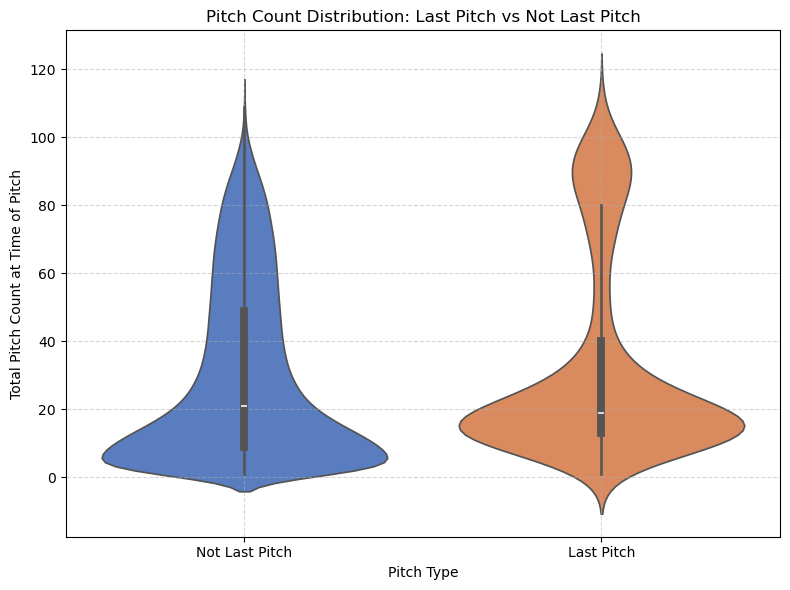

In [10]:
# Optional: Make labels more readable
df['is_last_pitch'] = df['last_pitch_of_game'].map({True: 'Last Pitch', False: 'Not Last Pitch'})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='is_last_pitch', y='pitch_count', inner='box', palette='muted')

# Customize plot
plt.title('Pitch Count Distribution: Last Pitch vs Not Last Pitch')
plt.xlabel('Pitch Type')
plt.ylabel('Total Pitch Count at Time of Pitch')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [27]:
# Filter to final pitch for each pitcher in each game
final_pitches = df[df['last_pitch_of_game']]

# Check a few rows
final_pitches[['game_pk', 'pitcher', 'pitch_count']].head()


,game_pk,pitcher,pitch_count
753976,778698,700375,11
753906,778698,680573,57
753901,778698,700363,75
753898,778698,688427,3
753887,778698,661395,11


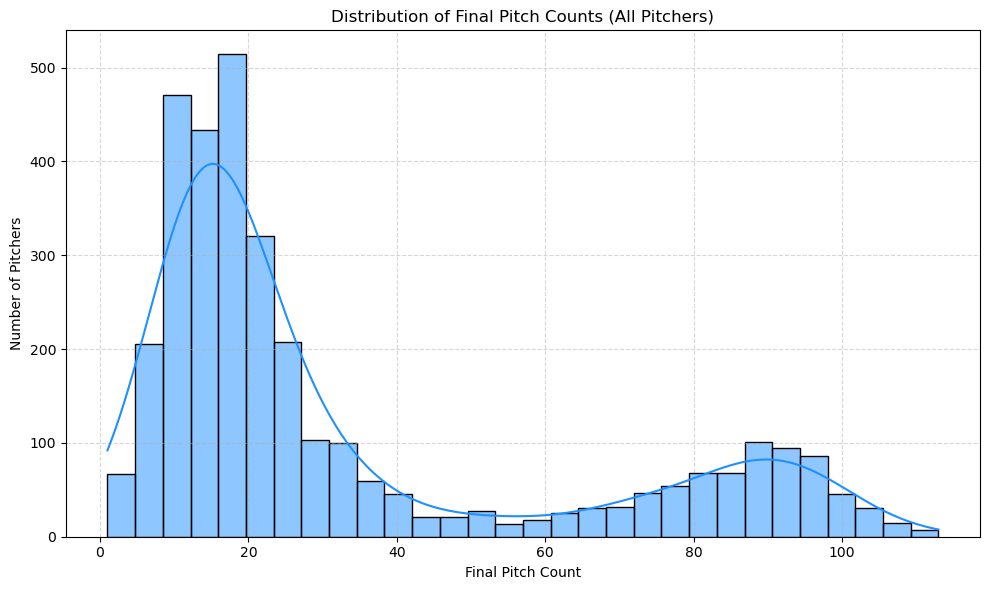

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(final_pitches['pitch_count'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Final Pitch Counts (All Pitchers)')
plt.xlabel('Final Pitch Count')
plt.ylabel('Number of Pitchers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
# Step 1: Get the first pitch each pitcher threw in each game
first_pitch_per_pitcher = df.groupby(['game_pk', 'pitcher']).head(1)

# Step 2: Starters are those whose first pitch came in inning 1 (top or bottom)
# Warning, this line really takes anyone whose first pitch was in 1st inning and calls them a starter
# So if a starter has a meltdown and a reliever comes in in the 1st, this is still labeling the reliever a starter
starters = first_pitch_per_pitcher[first_pitch_per_pitcher['inning'] == 1]

# Step 3: Create starter ID pairs (game_pk, pitcher)
starter_ids = starters[['game_pk', 'pitcher']].drop_duplicates()

# Step 4: Label each row in the full DataFrame as 'starter' or 'reliever'
df = df.copy()  # avoid SettingWithCopyWarning

is_starter = pd.MultiIndex.from_frame(df[['game_pk','pitcher']]).isin(
    pd.MultiIndex.from_frame(starter_ids)
)
df['role'] = np.where(is_starter, 'starter', 'reliever')


In [25]:
df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitch_count,last_pitch_of_game,role
754043,4887,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,starter
754042,4686,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,False,starter
754041,4539,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,False,starter
754040,4323,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",670242,700363,strikeout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,False,starter
754039,4137,NaN,2025-03-15,NaN,NaN,NaN,"Smith-Shawver, AJ",664056,700363,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,False,starter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1986,SL,2025-06-30,87.9,2.74,6.43,"Banks, Tanner",593428,621383,NaN,...,0.55,47.3,NaN,NaN,NaN,NaN,NaN,5,False,reliever
3,1922,SL,2025-06-30,87.3,2.82,6.42,"Banks, Tanner",593428,621383,NaN,...,0.46,46.9,NaN,NaN,NaN,NaN,NaN,6,False,reliever
2,1811,FF,2025-06-30,93.2,2.59,6.47,"Banks, Tanner",593428,621383,single,...,0.09,49.3,4.244712,7.659826,31.567804,31.050805,25.892308,7,False,reliever
1,1798,SI,2025-06-30,92.7,2.53,6.49,"Banks, Tanner",630105,621383,NaN,...,1.18,47.4,NaN,NaN,NaN,NaN,NaN,8,False,reliever


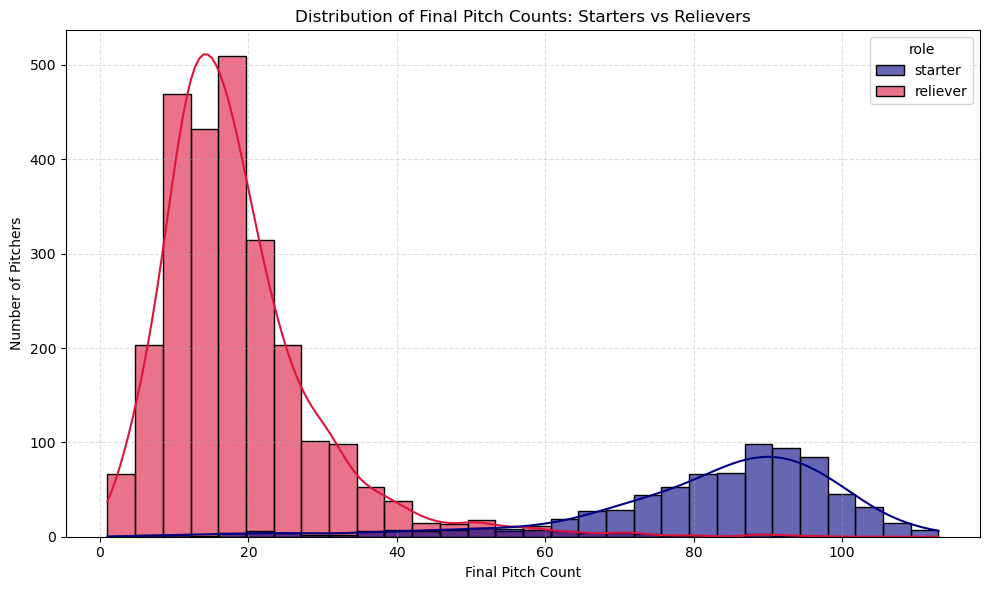

In [14]:
# Final pitches only
final_pitches = df[df['last_pitch_of_game']]

# Plot the distribution by role
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    data=final_pitches,
    x='pitch_count',
    hue='role',
    bins=30,
    kde=True,
    palette={'starter': 'navy', 'reliever': 'crimson'},
    alpha=0.6
)
plt.title('Distribution of Final Pitch Counts: Starters vs Relievers')
plt.xlabel('Final Pitch Count')
plt.ylabel('Number of Pitchers')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


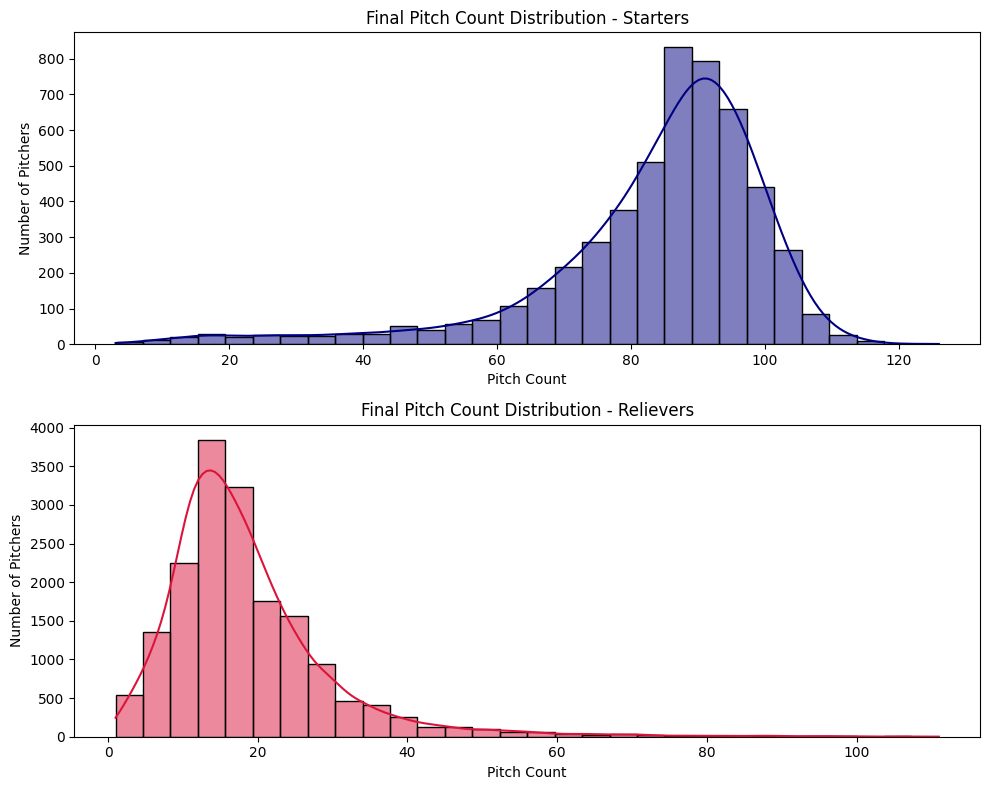

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Starter histogram
plt.subplot(2, 1, 1)
sns.histplot(final_pitches[final_pitches['role'] == 'starter']['pitch_count'], bins=30, color='navy', kde=True)
plt.title('Final Pitch Count Distribution - Starters')
plt.xlabel('Pitch Count')
plt.ylabel('Number of Pitchers')

# Reliever histogram
plt.subplot(2, 1, 2)
sns.histplot(final_pitches[final_pitches['role'] == 'reliever']['pitch_count'], bins=30, color='crimson', kde=True)
plt.title('Final Pitch Count Distribution - Relievers')
plt.xlabel('Pitch Count')
plt.ylabel('Number of Pitchers')

plt.tight_layout()
plt.show()


In [17]:
# Group by 'last_pitch_of_game' and calculate mean pitch count
mean_pitch_counts = df.groupby('last_pitch_of_game')['pitch_count'].mean()
print(mean_pitch_counts)


last_pitch_of_game
False    30.200276
True     33.023423
Name: pitch_count, dtype: float64


In [18]:
df.head()

,game_date,game_pk,release_speed,release_pos_x,release_pos_z,batter,pitcher,inning,inning_topbot,events,description,pitch_number,pitch_count,last_pitch_of_game,is_last_pitch,role
109967,2025-09-01,776492,98.6,-2.10,5.34,671218,801403,1,Top,NaN,called_strike,1,1,False,Not Last Pitch,reliever
109966,2025-09-01,776492,96.9,-2.11,5.30,671218,801403,1,Top,field_out,hit_into_play,2,2,False,Not Last Pitch,reliever
109965,2025-09-01,776492,98.9,-1.97,5.39,646240,801403,1,Top,NaN,ball,1,3,False,Not Last Pitch,reliever
109964,2025-09-01,776492,99.5,-2.20,5.32,646240,801403,1,Top,NaN,called_strike,2,4,False,Not Last Pitch,reliever
109963,2025-09-01,776492,89.9,-2.16,5.15,646240,801403,1,Top,NaN,foul,3,5,False,Not Last Pitch,reliever


The above section included pitchers who finished the game for their team. Those pitchers weren't ''pulled'' perse, so this section filters out those pitchers. It turns out to not have a huge effect on our visualizations.

In [29]:
# Step 1: Find the last pitch index for each game
last_pitch_in_game_idx = df.groupby('game_pk')['pitch_number'].idxmax()

# Step 2: Create a column to flag pitches that are the final pitch of the game
df['is_game_final_pitch'] = False
df.loc[last_pitch_in_game_idx, 'is_game_final_pitch'] = True

# Step 3: Exclude pitchers whose last pitch was the final pitch of the game
df_filtered = df[~((df['last_pitch_of_game']) & (df['is_game_final_pitch']))]


In [19]:
df_filtered.head()

,game_date,game_pk,release_speed,release_pos_x,release_pos_z,batter,pitcher,inning,inning_topbot,events,description,pitch_number,pitch_count,last_pitch_of_game,is_last_pitch,role,is_game_final_pitch
109967,2025-09-01,776492,98.6,-2.10,5.34,671218,801403,1,Top,NaN,called_strike,1,1,False,Not Last Pitch,starter,False
109966,2025-09-01,776492,96.9,-2.11,5.30,671218,801403,1,Top,field_out,hit_into_play,2,2,False,Not Last Pitch,starter,False
109965,2025-09-01,776492,98.9,-1.97,5.39,646240,801403,1,Top,NaN,ball,1,3,False,Not Last Pitch,starter,False
109964,2025-09-01,776492,99.5,-2.20,5.32,646240,801403,1,Top,NaN,called_strike,2,4,False,Not Last Pitch,starter,False
109963,2025-09-01,776492,89.9,-2.16,5.15,646240,801403,1,Top,NaN,foul,3,5,False,Not Last Pitch,starter,False


/tmp/ipykernel_53238/83158047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_last_pitch'] = df_filtered['last_pitch_of_game'].map({True: 'Last Pitch', False: 'Not Last Pitch'})
/tmp/ipykernel_53238/83158047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='is_last_pitch', y='pitch_count', inner='box', palette='muted')


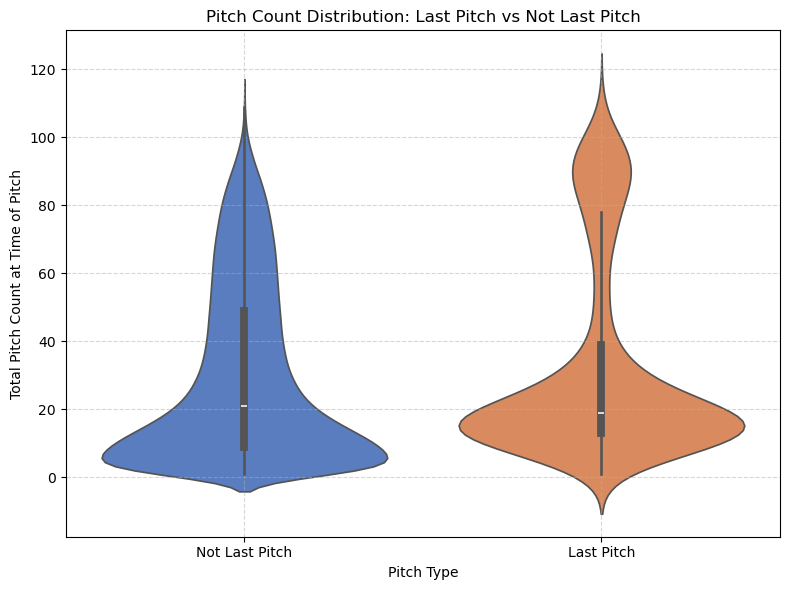

In [20]:
# Optional: Make labels more readable
df_filtered['is_last_pitch'] = df_filtered['last_pitch_of_game'].map({True: 'Last Pitch', False: 'Not Last Pitch'})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_filtered, x='is_last_pitch', y='pitch_count', inner='box', palette='muted')

# Customize plot
plt.title('Pitch Count Distribution: Last Pitch vs Not Last Pitch')
plt.xlabel('Pitch Type')
plt.ylabel('Total Pitch Count at Time of Pitch')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The visualization doesn't look that different, so I'm just going to use df and not df_filtered for now. Next, take just the starters and build a model for them.

In [30]:
# # Step 1: Get the first pitch of each pitcher in each game
# first_pitches = df.groupby(['game_pk', 'pitcher'])['pitch_number'].min().reset_index()

# # Step 2: Merge it back to the main DataFrame to get the inning and inning_topbot of their first pitch
# first_pitch_data = df.merge(first_pitches, on=['game_pk', 'pitcher', 'pitch_number'])

# # Step 3: Starting pitchers throw the first pitch of the Top or Bottom of the 1st inning
# # So filter for inning == 1
# starter_ids = first_pitch_data[
#     (first_pitch_data['inning'] == 1)
# ]['pitcher'].unique()

# Step 4: Filter the original DataFrame to include only those starters
df_starters = df[df['role'] == 'starter']


/var/folders/tt/jcc6npcd60n8dct63xynxvs80000gn/T/ipykernel_17971/3190015920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starters['is_last_pitch'] = df_starters['last_pitch_of_game'].map({True: 'Last Pitch', False: 'Not Last Pitch'})
/var/folders/tt/jcc6npcd60n8dct63xynxvs80000gn/T/ipykernel_17971/3190015920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_starters, x='is_last_pitch', y='pitch_count', inner='box', palette='muted')


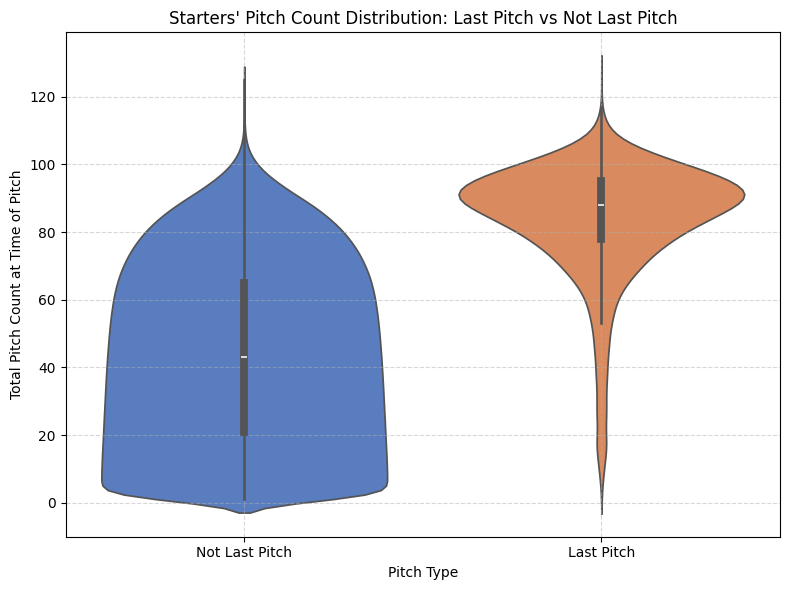

In [31]:
# Optional: Make labels more readable
df_starters['is_last_pitch'] = df_starters['last_pitch_of_game'].map({True: 'Last Pitch', False: 'Not Last Pitch'})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_starters, x='is_last_pitch', y='pitch_count', inner='box', palette='muted')

# Customize plot
plt.title('Starters\' Pitch Count Distribution: Last Pitch vs Not Last Pitch')
plt.xlabel('Pitch Type')
plt.ylabel('Total Pitch Count at Time of Pitch')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [23]:
# Group by 'last_pitch_of_game' and calculate mean pitch count
mean_pitch_counts = df_starters.groupby('last_pitch_of_game')['pitch_count'].mean()
print(mean_pitch_counts)


last_pitch_of_game
False    43.177617
True     82.352785
Name: pitch_count, dtype: float64


In [43]:
df_model["is_last_pitch"].value_counts()

is_last_pitch
Not Last Pitch    429327
Last Pitch          5194
Name: count, dtype: int64

In [35]:
# Make sure you have the clean starter-only dataset
df_model = df_starters.copy()

# Explanatory and response variables
X = df_model[['pitch_count']]
y = df_model['last_pitch_of_game'].astype(int)  # Convert boolean to 0/1

# Add intercept
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit()

# Summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.048794
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:     last_pitch_of_game   No. Observations:               434521
Model:                          Logit   Df Residuals:                   434519
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.2470
Time:                        13:28:25   Log-Likelihood:                -21202.
converged:                       True   LL-Null:                       -28155.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.2470      0.083   -123.024      0.000     -10.410     -10.084
pitch_count     0.0861   

In [25]:
# Get odds ratios
odds_ratios = np.exp(model.params)
print(odds_ratios)


const          0.000062
pitch_count    1.083190
dtype: float64


In [37]:
# Data
X = df_model[['pitch_count']]
y = df_model['last_pitch_of_game'].astype(int)

# Fit model
logreg = LogisticRegression()
logreg.fit(X, y)

# Predict probabilities
y_pred_proba = logreg.predict_proba(X)[:, 1]

# AUC Score
auc = roc_auc_score(y, y_pred_proba)
print("AUC Score:", auc)


AUC Score: 0.8971020925239082


/opt/homebrew/Caskroom/miniforge/base/envs/erdos/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


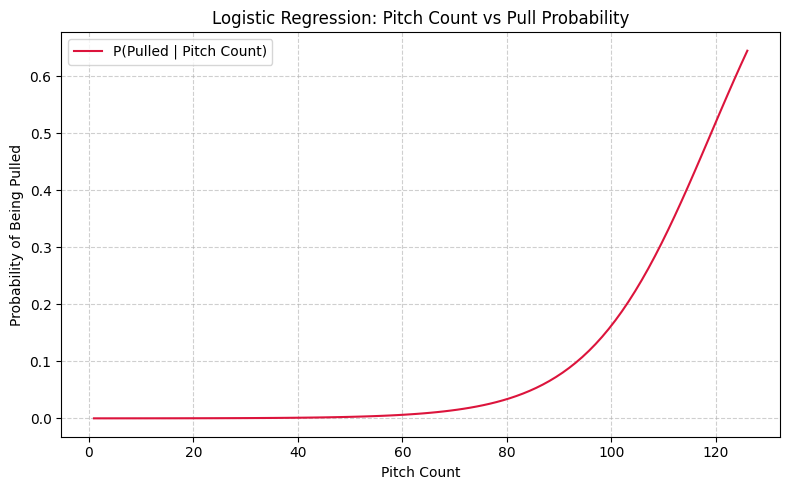

In [38]:
# Create pitch count range
pitch_range = np.linspace(df_model['pitch_count'].min(), df_model['pitch_count'].max(), 100).reshape(-1, 1)

# Predict probability of being pulled
prob_pull = logreg.predict_proba(pitch_range)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(pitch_range, prob_pull, label='P(Pulled | Pitch Count)', color='crimson')
plt.xlabel('Pitch Count')
plt.ylabel('Probability of Being Pulled')
plt.title('Logistic Regression: Pitch Count vs Pull Probability')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
features = ['pitch_count', 'release_speed', 'plate_x', 'plate_z', 'delta_run_exp', 
            'on_1b', 'on_2b', 'on_3b', 'events', 'outs_when_up', 
            'balls', 'strikes', 'bat_score', 'post_bat_score']
target = 'last_pitch_of_game'  # Target variable

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df_model.select_dtypes(include=['object']).columns:
    df_model[col] = label_encoder.fit_transform(df_model[col])

In [57]:
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [63]:
roc_auc_score(y_test, y_pred)

0.8963213592851785

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98     85866
        True       0.19      0.84      0.31      1039

    accuracy                           0.96     86905
   macro avg       0.59      0.90      0.64     86905
weighted avg       0.99      0.96      0.97     86905



In [64]:
# Get feature importance scores
importance = xgb.feature_importances_

# Map feature importance to feature names
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

           Feature  Importance
8           events    0.820671
0      pitch_count    0.047680
9     outs_when_up    0.032811
13  post_bat_score    0.016624
12       bat_score    0.014631
4    delta_run_exp    0.009862
2          plate_x    0.008485
5            on_1b    0.008450
7            on_3b    0.007822
1    release_speed    0.007712
3          plate_z    0.007164
6            on_2b    0.006966
11         strikes    0.006374
10           balls    0.004749


In [67]:
df['events'].value_counts()

events
field_out                    78507
strikeout                    43132
single                       27790
walk                         15850
double                        8270
home_run                      5957
force_out                     3586
grounded_into_double_play     3350
hit_by_pitch                  2048
sac_fly                       1375
field_error                   1092
triple                         682
sac_bunt                       573
fielders_choice                406
double_play                    403
fielders_choice_out            340
truncated_pa                   339
strikeout_double_play          132
catcher_interf                  92
sac_fly_double_play             19
triple_play                      3
Name: count, dtype: int64

In [69]:
grouped = pd.DataFrame({
    'Mean Target': X_train.assign(target=y_train).groupby("events")['target'].mean(),
    'Count': X_train.groupby('events').size()
}).reset_index()
print(grouped)

    events  Mean Target   Count
0        0     0.023810      42
1        1     0.049886    3949
2        2     0.042553     188
3        3     0.048638     514
4        4     0.045507   37357
5        5     0.069767     172
6        6     0.063830     141
7        7     0.051485    1515
8        8     0.068804    1497
9        9     0.040142     847
10      10     0.043299    2910
11      11     0.030303     198
12      12     0.033628     565
13      13     0.000000      10
14      14     0.038849   12896
15      15     0.048212   19435
16      16     0.088235      68
17      17     0.054839     310
18      18     0.000000       2
19      19     0.121622     148
20      20     0.048048    6889
21      21     0.000105  257963


In [84]:
features = ['pitch_count', 'release_speed', 'plate_x', 'plate_z', 'delta_run_exp', 
        'events', 'outs_when_up', 
            'balls', 'strikes', 'bat_score', 'post_bat_score']
target = 'last_pitch_of_game'  # Target variable

In [87]:
df_combined = df_model[features + [target]].dropna()
X = df_combined[features]
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [89]:
# Fit model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred = logreg.predict(X_test)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc)

AUC Score: 0.5741237891398737


/opt/homebrew/Caskroom/miniforge/base/envs/erdos/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
